In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [64]:
def plot_correlation(data, columns):
    cm = np.corrcoef(data.T)
    plt.figure(figsize=(10,10))
    heatmap = sb.heatmap(cm, cbar=True, annot=True, square=True,
                         fmt='.2f', annot_kws={'size':10}, xticklabels=columns, yticklabels=columns)
def test_f1_score_error(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average=None)
def test_roc_auc_score_error(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return roc_auc_score(y_test, y_pred, average='micro')

In [45]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train.head()

,M,3.1109999999999998,2.4989999999999997,0.816,5.844599999999999,3.0446999999999997,Unnamed: 6,1.9924630823006226,8
0,M,2.3715,1.8360,0.5355,2.19810,1.222069,0.545700,NaN,9
1,M,2.4990,2.0145,0.7140,2.79990,1.129650,0.650250,0.7650,11
2,M,3.2130,2.5245,0.8160,5.57430,2.534700,1.127100,1.6065,12
3,M,2.9325,2.2185,0.6885,5.05920,2.203200,1.254302,NaN,10
4,M,3.6465,2.7285,0.9690,8.54505,4.533900,1.596300,2.1420,10


In [46]:
df_train.columns = ['sex', 'a', 'b', 'c', 'd', 'e', 'f', 'h', 'class']
df_test.columns = ['sex', 'a', 'b', 'c', 'd', 'e', 'f', 'h', 'class']
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 9 columns):
sex      10578 non-null object
a        10046 non-null float64
b        10050 non-null float64
c        10043 non-null float64
d        10054 non-null float64
e        10052 non-null float64
f        10073 non-null float64
h        10018 non-null float64
class    10578 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 743.8+ KB


In [47]:
df_train['a'].fillna(df_train['a'].mean(), inplace = True)
df_train['b'].fillna(df_train['b'].mean(), inplace = True)
df_train['c'].fillna(df_train['c'].mean(), inplace = True)
df_train['d'].fillna(df_train['d'].mean(), inplace = True)
df_train['e'].fillna(df_train['e'].mean(), inplace = True)
df_train['f'].fillna(df_train['f'].mean(), inplace = True)
df_train['h'].fillna(df_train['h'].mean(), inplace = True)
df_train[['class']] = df_train[['class']].astype("float")
df_train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df_test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [48]:
df_train.describe()

,a,b,c,d,e,f,h,class
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,2.799380,2.191912,0.767050,4.472694,2.005271,1.008515,1.296892,9.701361
std,0.514970,0.432703,0.229174,2.274306,1.079397,0.531370,0.623882,1.901408
min,1.045500,0.790500,0.000000,0.216750,0.086700,0.028050,0.079050,7.000000
25%,2.448000,1.912500,0.637500,2.706187,1.180650,0.601800,0.826200,8.000000
50%,2.805000,2.193000,0.765000,4.444650,1.953300,0.981750,1.296892,9.000000
75%,3.162000,2.499000,0.867000,5.885400,2.646900,1.331100,1.675350,11.000000
max,4.569913,3.776277,6.007583,14.175450,7.588800,3.876000,4.896377,16.000000


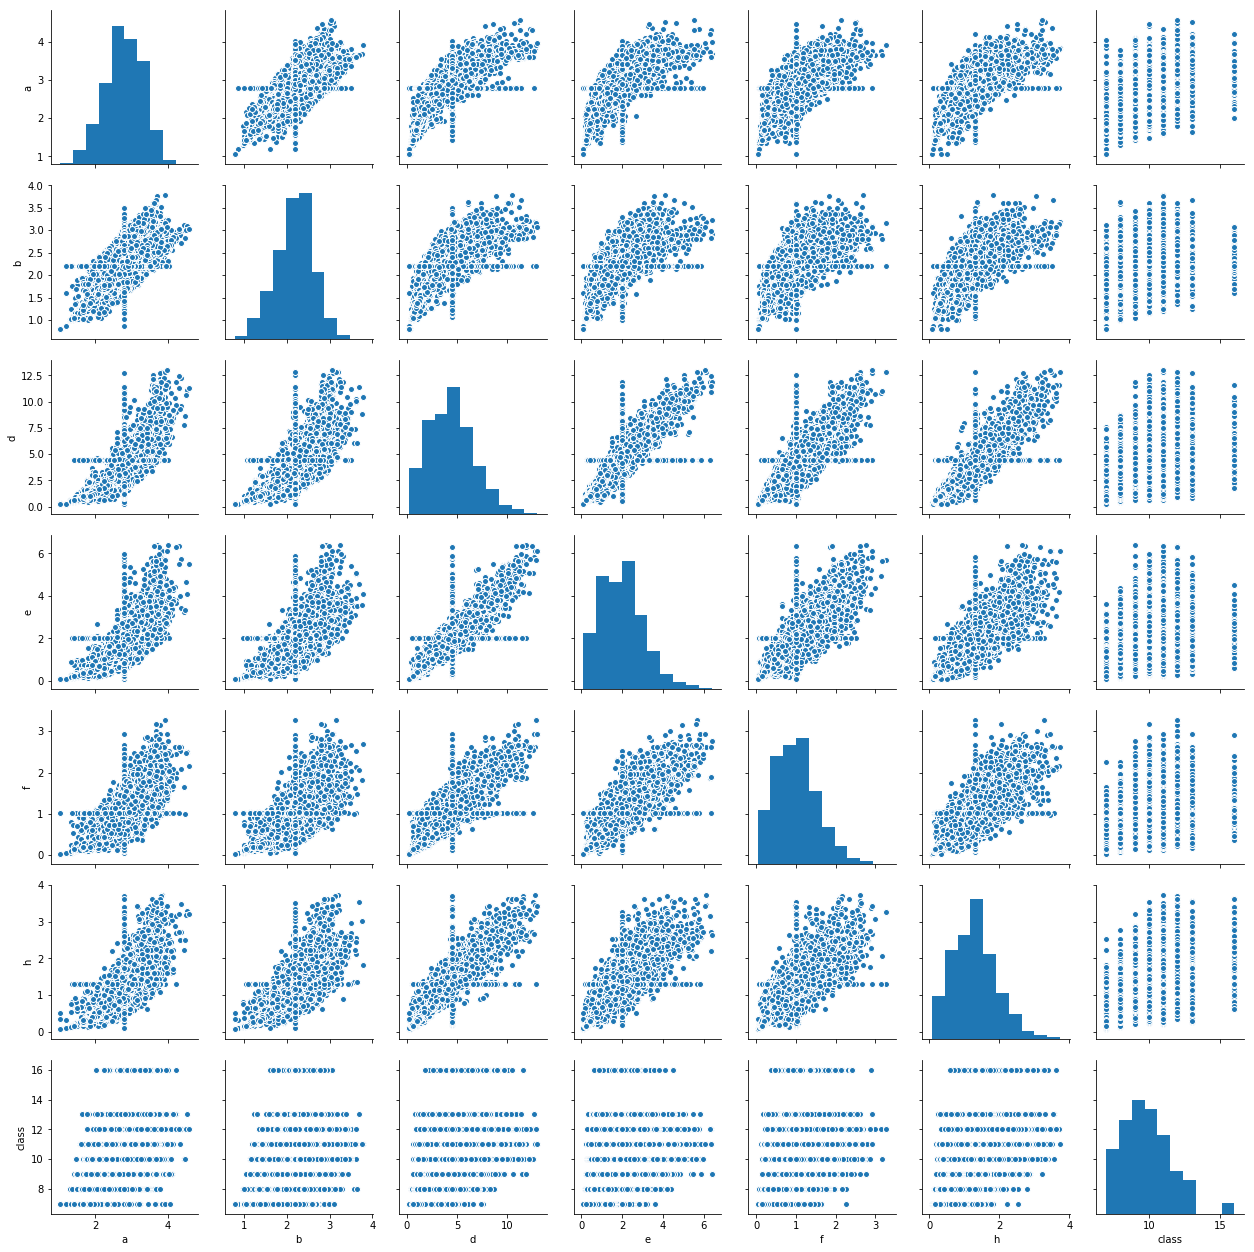

In [90]:
sb.pairplot(df_train)

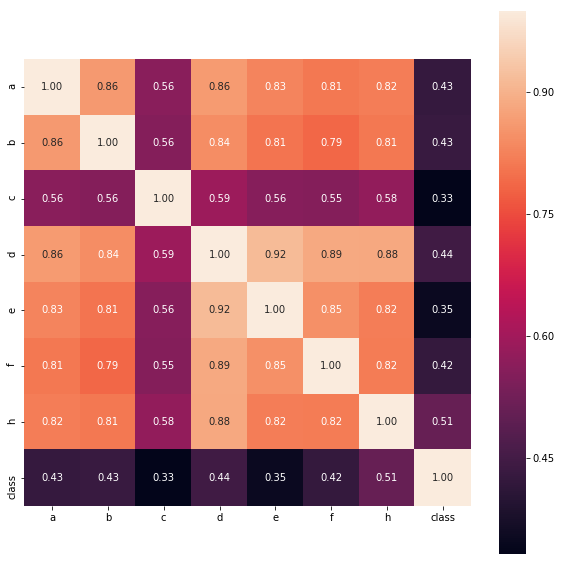

In [50]:
columns = ['a', 'b', 'c', 'd', 'e', 'f', 'h', 'class']

plot_correlation(df_train[['a', 'b', 'c', 'd', 'e', 'f', 'h', 'class']], columns)

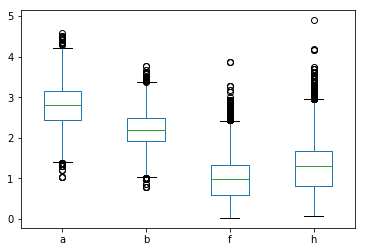

In [51]:
df_train[['a', 'b', 'f', 'h']].plot(kind = 'box')

(<matplotlib.axes._subplots.AxesSubplot at 0x1c2bf5d8630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2c09f96a0>)

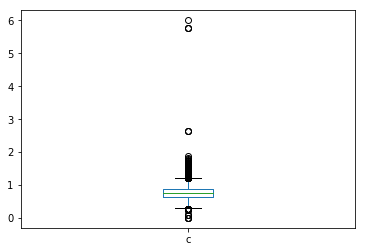

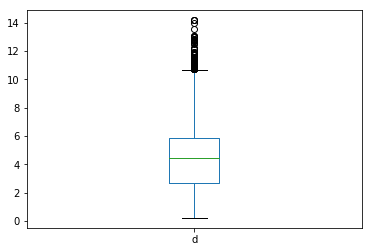

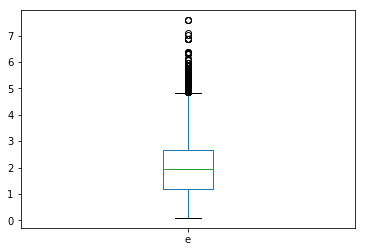

In [52]:
df_train[['c']].plot(kind = 'box'), df_train[['d']].plot(kind = 'box'), df_train[['e']].plot(kind = 'box')

In [53]:
df_train = df_train.drop(['c'], axis = 1)
df_test = df_test.drop(['c'], axis = 1)
df_train = df_train[df_train['e']<6.4]
df_train = df_train[df_train['d']<13]
df_train = df_train[df_train['h']<4]
df_train = df_train[df_train['f']<3.5]

In [54]:
df_test['sex'].unique()

array(['F', 'M', 'I', '--', '?'], dtype=object)

In [55]:
X_train = df_train.values[:,1:]
y_train = df_train.values[:,0]
X_test = df_test.values[:,1:]
y_test = df_test.values[:,0]

In [56]:
# Convert categorical variable into dummy/indicator variables
# df_train = pd.get_dummies(df_train, columns=['sex'])
# df_test = pd.get_dummies(df_test, columns=['sex'])
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

C:\Users\korin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\korin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\korin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\korin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [75]:
from sklearn.linear_model import LogisticRegression

lin_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
f1_1 = test_f1_score_error(lin_reg, X_train, X_test, y_train, y_test)
#auc_roc = test_roc_auc_score_error(lin_reg, X_train, X_test, y_train, y_test)
print(f1_1)

[0.         0.         0.33405172 0.64830119 0.51824366]


C:\Users\korin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\korin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
from sklearn.svm import SVC
SVC = SVC()
f1_1 = test_f1_score_error(SVC, X_train, X_test, y_train, y_test)
#auc_roc = test_roc_auc_score_error(lin_reg, X_train, X_test, y_train, y_test)
print(f1_1)

[0.         0.         0.38187702 0.66037736 0.55980571]


C:\Users\korin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
f1_1 = test_f1_score_error(dtc, X_train, X_test, y_train, y_test)
# auc_roc = test_roc_auc_score_error(lin_reg, X_train, X_test, y_train, y_test)
print(f1_1)

[0.01242236 0.         0.56669428 0.66170213 0.59957173]


In [78]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
f1_1 = test_f1_score_error(knc, X_train, X_test, y_train, y_test)
# auc_roc = test_roc_auc_score_error(lin_reg, X_train, X_test, y_train, y_test)
print(f1_1)

[0.02       0.         0.54089069 0.66251298 0.56460674]


C:\Users\korin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
f1_1 = test_f1_score_error(gnb, X_train, X_test, y_train, y_test)
# auc_roc = test_roc_auc_score_error(lin_reg, X_train, X_test, y_train, y_test)
print(f1_1)

[0.         0.         0.51323829 0.61429694 0.19144144]


C:\Users\korin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('dtc', dtc), ('knc', knc), ('gnb', gnb)], voting='soft')

params = {}
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=4)
f1_1 = test_f1_score_error(grid, X_train, X_test, y_train, y_test)
# auc_roc = test_roc_auc_score_error(lin_reg, X_train, X_test, y_train, y_test)
print(f1_1)

C:\Users\korin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\korin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\korin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\korin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

[0.03809524 0.         0.60408163 0.71102662 0.6004481 ]
